# Ceneo analyzer

## Biblioteki

In [11]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów produktów o których zostały pobrane opinie

In [3]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

114700014


## Kod produktu którego opinie mają zostać przeanalizowane

In [4]:
product_id = input("proszę podać kod produktu z serwisu Ceneo.pl")


## Wczytanie do obiektu Pandas.DataFrame opinii o wskazanym produkcie

In [35]:
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions_rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",",".")).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r : "Brak rekomendacji" if r is None else r)

## Podstawowe statystyki zbioru opinii

In [36]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: 1 if p else 0).sum()
cons_count = opinions.cons.apply(lambda c: 1 if c else 0).sum()
average_rating = opinions_rating.mean()

In [37]:
average_rating

4.804945054945055

## Histogram częstości poszczególnych ocen produktu


In [27]:
rating_distribution = opinions_rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
rating_distribution

rating
0.0      0
0.5      0
1.0      2
1.5      0
2.0      0
2.5      1
3.0      1
3.5      2
4.0     11
4.5     18
5.0    147
Name: count, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '11'),
 Text(0, 0, '18'),
 Text(0, 0, '147')]

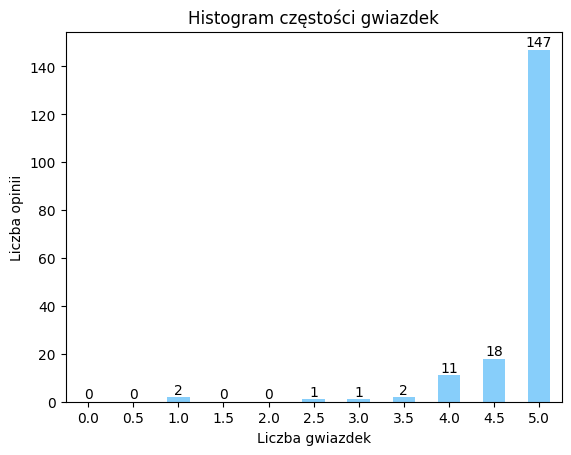

In [38]:
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = "lightskyblue")
plt.title("Histogram częstości gwiazdek")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
plt.bar_label(ax.containers[0], label_type='edge')


## Udział poszczególnych rekomendacji w opiniach o produkcie

In [41]:
recommendations_distribution = opinions.recommendation.value_counts().reindex(["Polecam", "Nie polecam", "Brak rekomendacji"])
recommendations_distribution

recommendation
Polecam              176
Nie polecam            3
Brak rekomendacji      3
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji')

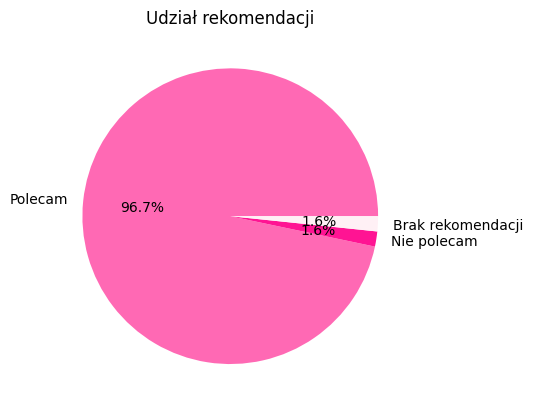

In [48]:
recommendations_distribution.plot.pie(
    colors = ["hotpink", "deeppink", "lavenderblush"],
    autopct = "%1.1f%%",
    label = ''
)
plt.title("Udział rekomendacji")